
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        # Compute mean and standard deviation for each column (feature)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        # Avoid division by zero if std is 0
        self.std[self.std == 0] = 1e-9

    def transform(self, X):
        # Standardize the features: (x - mean) / std
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        # Combine fit and transform steps
        self.fit(X)
        return self.transform(X)

In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.epochs):
            # Forward Pass: Predicted y = Xw + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute MSE with L2 Penalty
            mse_loss = (1 / (2 * n_samples)) * np.sum((y_predicted - y)**2)
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            total_loss = mse_loss + l2_penalty
            self.loss_history.append(total_loss)

            # Compute Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Return predicted values based on learned weights and bias
        return np.dot(X, self.weights) + self.bias

In [4]:
# Generate Synthetic Dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.flatten()

# Scale Features (using the manual implementation)
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Initialize and Train Linear Regression with Regularization
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

print(f"Final Weights: {model.weights}")
print(f"Final Bias: {model.bias}")

Final Weights: [1.63818903]
Final Bias: 6.8197096720175505


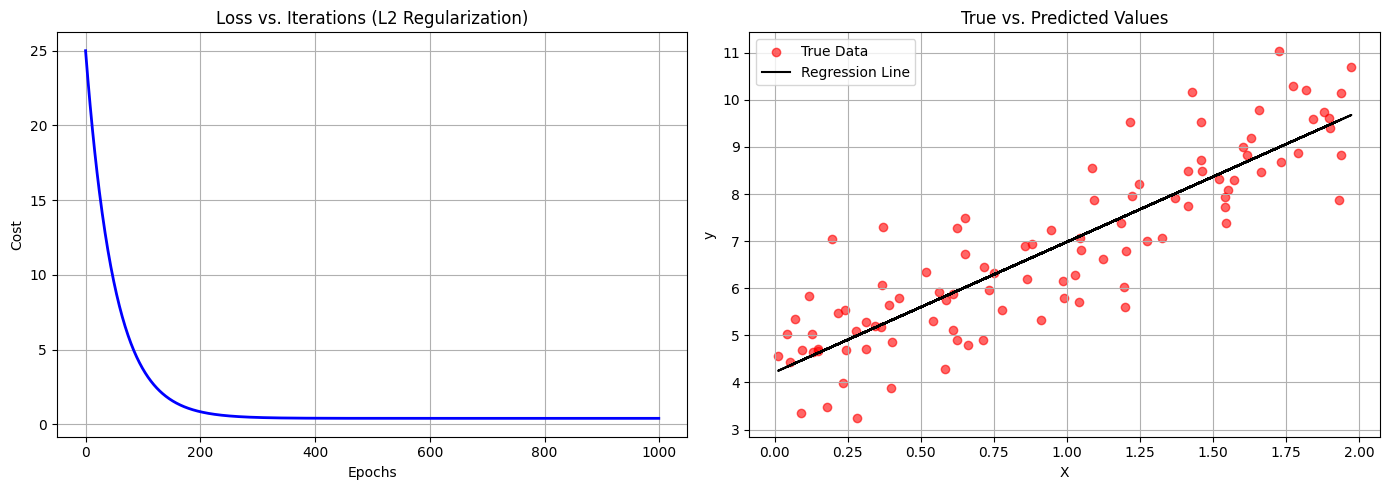

In [5]:
# Display Results
plt.figure(figsize=(14, 5))

# Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='blue', lw=2)
plt.title("Loss vs. Iterations (L2 Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid(True)

# True vs Predicted Values
plt.subplot(1, 2, 2)
y_pred = model.predict(X_scaled)
plt.scatter(X, y, color='red', alpha=0.6, label='True Data')
plt.plot(X, y_pred, color='black', label='Regression Line')
plt.title("True vs. Predicted Values")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [6]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    # Formula: 1 / (1 + exp(-z))
    return 1 / (1 + np.exp(-z))

In [7]:
#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for i in range(self.epochs):
            # Linear combination: z = Xw + b
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute Binary Cross Entropy Loss with L2 Regularization
            epsilon = 1e-15  # Add small epsilon to avoid log(0)
            term_1 = y * np.log(y_predicted + epsilon)
            term_2 = (1 - y) * np.log(1 - y_predicted + epsilon)
            bce_loss = -np.mean(term_1 + term_2)

            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            total_loss = bce_loss + l2_penalty
            self.loss_history.append(total_loss)

            # Compute Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        # Returns the probability of class 1
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        # Returns class labels (0 or 1) using a 0.5 threshold
        y_predicted_cls = [1 if i > 0.5 else 0 for i in self.predict_proba(X)]
        return np.array(y_predicted_cls)

In [8]:
# Generate Synthetic Binary Classification Dataset
from sklearn.datasets import make_blobs # Only used for data generation as allowed
X_class, y_class = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

# Reuse manual StandardScaler
scaler_logit = StandardScalerManual()
X_class_scaled = scaler_logit.fit_transform(X_class)

# Train the Logistic Regression model
logit_model = LogisticRegressionManual(lr=0.1, epochs=2000, l2_lambda=0.1)
logit_model.fit(X_class_scaled, y_class)

# Calculate Final Accuracy
predictions = logit_model.predict(X_class_scaled)
accuracy = np.mean(predictions == y_class) * 100
print(f"Final Training Accuracy: {accuracy:.2f}%")

Final Training Accuracy: 100.00%


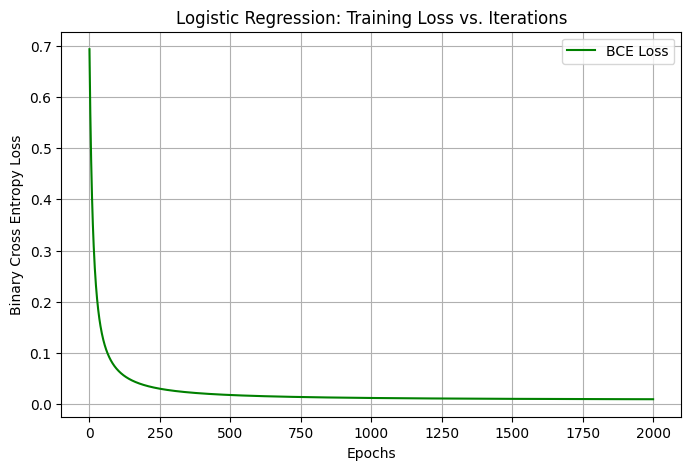

In [9]:
# Display Results
plt.figure(figsize=(8, 5))
plt.plot(logit_model.loss_history, color='green', label='BCE Loss')
plt.title("Logistic Regression: Training Loss vs. Iterations")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [10]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    """
    Returns:
    assignment_table: matrix of same shape as M with cluster labels
    cookbook: dict mapping cluster_id to list of (i, j) positions
    centroids: numpy array of centroid values
    """
    n, m = M.shape
    # Flatten the matrix
    elements = M.flatten().reshape(-1, 1)

    # Initialize centroids randomly from the existing elements
    np.random.seed(42)
    random_indices = np.random.choice(len(elements), k, replace=False)
    centroids = elements[random_indices]

    labels = np.zeros(len(elements))

    for _ in range(max_iters):
        # Find distance to each centroid using Euclidean distance: (value1 - value2)^2
        distances = np.linalg.norm(elements[:, np.newaxis] - centroids, axis=2)
        new_labels = np.argmin(distances, axis=1)

        # Check for convergence
        if np.array_equal(labels, new_labels):
            break
        labels = new_labels

        # Update Step: Compute new centroids as the mean of assigned elements
        for i in range(k):
            points_in_cluster = elements[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster, axis=0)

    # Prepare assignment_table: Reshape labels back to matrix shape
    assignment_table = labels.reshape(n, m).astype(int)

    # Prepare cookbook: Map cluster indices to (i, j) positions
    cookbook = {i: [] for i in range(k)}
    for r in range(n):
        for c in range(m):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    return assignment_table, cookbook, centroids.flatten()

In [11]:
# Create a random matrix M of shape (n, m)
n, m = 10, 10
M = np.random.rand(n, m) * 100  # Scaling values to 0-100 for variety

# Run K-Means for matrix elements
k = 3
assignment_table, cookbook, centroids = kmeans_matrix(M, k)

# Display Results
print("Centroids found:", centroids)
print("\nAssignment Table (Cluster Labels):")
print(assignment_table)

# Display a sample of the cookbook (first few positions for cluster 0)
print(f"\nCookbook Sample (Cluster 0 first 5 positions): {cookbook[0][:5]}")

Centroids found: [83.62962907 51.79556261 17.04023131]

Assignment Table (Cluster Labels):
[[0 1 1 1 2 0 2 2 1 2]
 [0 0 0 1 2 0 1 0 0 0]
 [2 1 0 2 2 1 0 0 1 2]
 [1 0 2 1 0 0 0 0 1 2]
 [0 0 0 0 1 1 0 1 0 0]
 [0 2 1 2 1 2 1 1 2 1]
 [2 2 0 1 2 1 0 2 1 2]
 [2 1 1 1 0 0 1 2 0 2]
 [1 2 2 0 0 0 1 2 2 2]
 [1 0 1 2 0 0 1 1 1 2]]

Cookbook Sample (Cluster 0 first 5 positions): [(0, 0), (0, 5), (1, 0), (1, 1), (1, 2)]


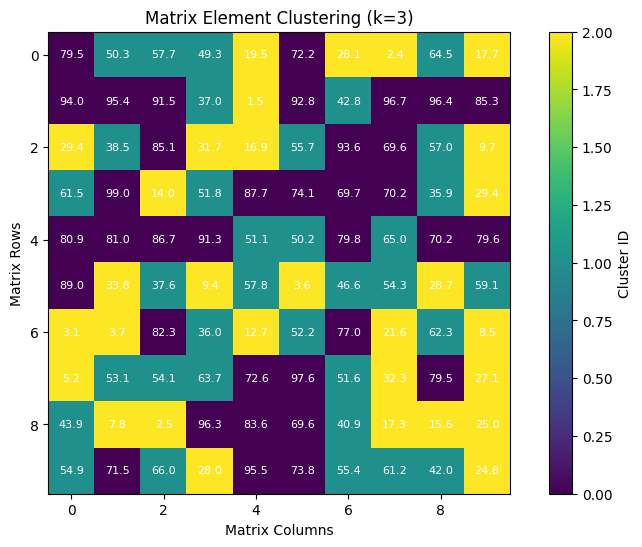

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(assignment_table, cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title(f"Matrix Element Clustering (k={k})")
plt.xlabel("Matrix Columns")
plt.ylabel("Matrix Rows")

# Annotate each cell with its actual value
for i in range(n):
    for j in range(m):
        plt.text(j, i, f'{M[i, j]:.1f}', ha='center', va='center', color='white', fontsize=8)

plt.show()

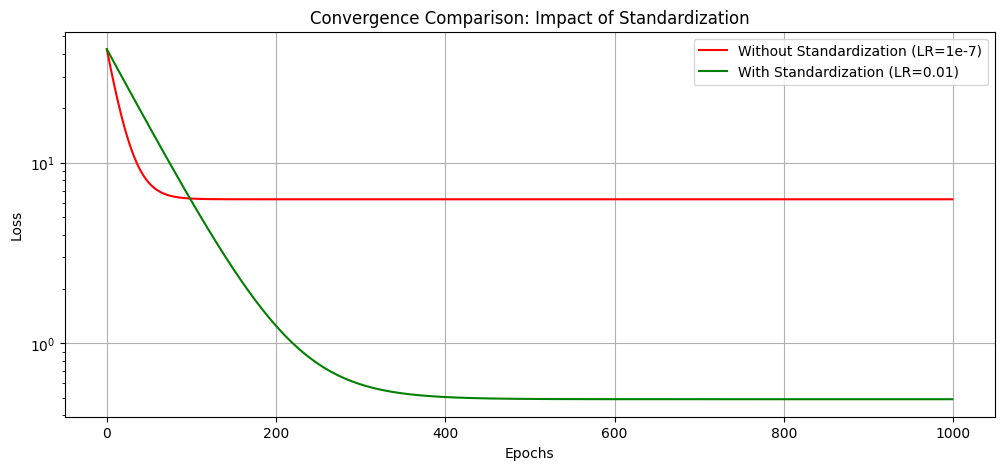

In [13]:
# Bonus Section

# Create a synthetic dataset with features on different scales
np.random.seed(42)
X_unscaled = np.random.rand(100, 2)
X_unscaled[:, 1] = X_unscaled[:, 1] * 1000  # Scale second feature significantly higher
y_bonus = 3 * X_unscaled[:, 0] + 0.005 * X_unscaled[:, 1] + 5 + np.random.randn(100)

# Model without standardization
model_no_std = LinearRegressionManual(lr=1e-7, epochs=1000, l2_lambda=0) # Very small LR to prevent divergence
model_no_std.fit(X_unscaled, y_bonus)

# Model with standardization
scaler_bonus = StandardScalerManual()
X_scaled_bonus = scaler_bonus.fit_transform(X_unscaled)
model_with_std = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0)
model_with_std.fit(X_scaled_bonus, y_bonus)

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(model_no_std.loss_history, label='Without Standardization (LR=1e-7)', color='red')
plt.plot(model_with_std.loss_history, label='With Standardization (LR=0.01)', color='green')
plt.title("Convergence Comparison: Impact of Standardization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log') # Log scale helps see differences in magnitude
plt.grid(True)
plt.show()

# Reasoning: Without standardization, we are forced to use a tiny learning rate to
# prevent the gradient from exploding due to the large feature values.
# Standardization allows for a much larger learning rate and faster convergence.

Lambda: 0 | Final Weights: [1.00610852 1.50923734]
Lambda: 0.1 | Final Weights: [1.00508879 1.50774709]
Lambda: 1 | Final Weights: [0.99599748 1.49445849]
Lambda: 10 | Final Weights: [0.91294182 1.37284458]
Lambda: 100 | Final Weights: [0.49283015 0.75044908]


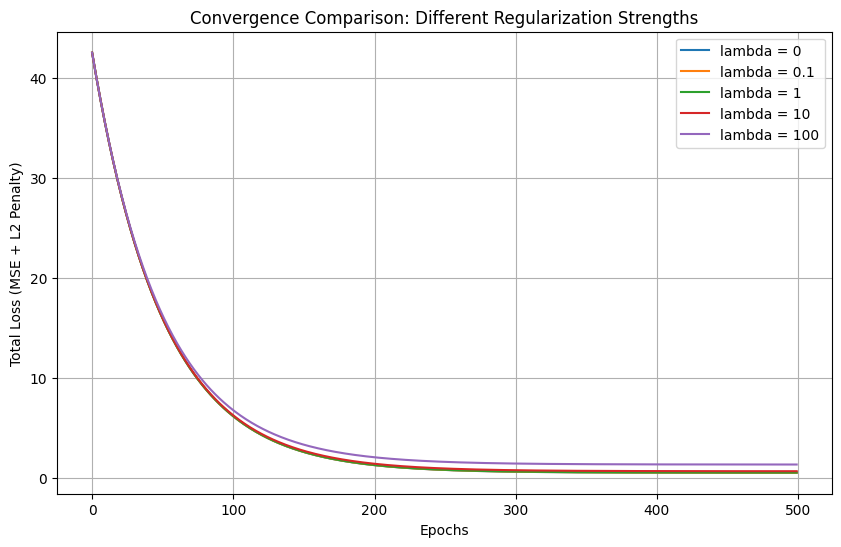

In [14]:
# Experimenting with different lambda values
lambdas = [0, 0.1, 1, 10, 100]
plt.figure(figsize=(10, 6))

for lb in lambdas:
    model_reg = LinearRegressionManual(lr=0.01, epochs=500, l2_lambda=lb)
    model_reg.fit(X_scaled_bonus, y_bonus)
    plt.plot(model_reg.loss_history, label=f'lambda = {lb}')
    print(f"Lambda: {lb} | Final Weights: {model_reg.weights}")

plt.title("Convergence Comparison: Different Regularization Strengths")
plt.xlabel("Epochs")
plt.ylabel("Total Loss (MSE + L2 Penalty)")
plt.legend()
plt.grid(True)
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
